# Notebook to calculate and plot the correlation function

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import Corrfunc
from Corrfunc.theory.xi import xi

In [2]:
fname_on='/data/desi/common/astrid/spectra_ASTRID_z2.5_500x500x2500.hdf5'

In [3]:
with h5py.File(fname_on,'r') as f:
    tau_on = f['tau/H/1/1215'][:]
    colden = f['colden']['H/1'][:]
    axes = f['spectra/axes'][:]
    # (x,y,z) start of the skewers, in kpc/h
    cofm_hkpc = f['spectra/cofm'][:]

In [4]:
L_hMpc=250
Nsk=int(np.sqrt(colden.shape[0]))
Np=int(colden.shape[1])
dz_hMpc=L_hMpc/Np
dxy_hMpc=L_hMpc/Nsk

max_colden=np.max(colden.reshape([Nsk,Nsk,Np]),axis=2)

In [5]:
def DLAs_coords(mincolden, maxcolden, fname_on):
    with h5py.File(fname_on,'r') as f:
        tau_on = f['tau/H/1/1215'][:]
        colden = f['colden']['H/1'][:]
        axes = f['spectra/axes'][:]
        # (x,y,z) start of the skewers, in kpc/h
        cofm_hkpc = f['spectra/cofm'][:]
    L_hMpc=250
    Nsk=int(np.sqrt(colden.shape[0]))
    Np=int(colden.shape[1])
    dz_hMpc=L_hMpc/Np
    dxy_hMpc=L_hMpc/Nsk
    
    def skewer_index(ix, iy):
        """Given the ix, iy indices, return the global index of a given skewer"""
        return ix*Nsk+iy
    
    max_colden=np.max(colden.reshape([Nsk,Nsk,Np]),axis=2)
    
    coordinates = {
    "x": np.array([]),
    "y": np.array([]),
    "z": np.array([])
    }
   
    for i in range(Nsk):
        for j in range(Nsk):
            if mincolden < max_colden[i][j] < maxcolden:
                coordinates["x"] = np.append(coordinates["x"], dxy_hMpc*i)
                coordinates["y"] = np.append(coordinates["y"], dxy_hMpc*j)
    for i in range(max(len(coordinates["x"]), len(coordinates["y"]))):
        coordinates["z"] = np.append(coordinates["z"], dz_hMpc*np.argmax(tau_on[int(skewer_index(coordinates["x"][i],coordinates["y"][i]))]))
    return coordinates

In [6]:
coords = DLAs_coords(1e22, 1e23, fname_on)

In [7]:
binf = np.logspace(np.log10(2), np.log10(20), 10)
x=coords["x"]
y=coords["y"]
z=coords["z"]
func = Corrfunc.theory.xi(boxsize=250.0, nthreads=1, binfile=binf, X=x,Y=y,Z=z, output_ravg=True)

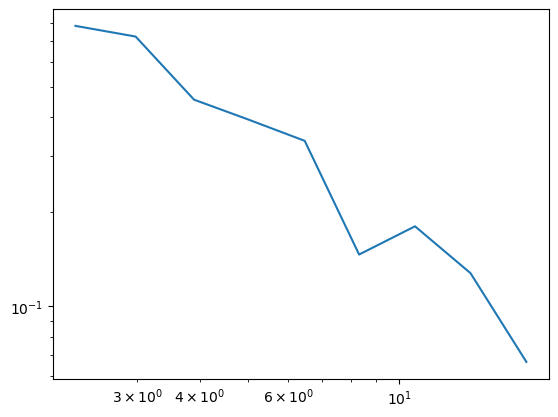

In [8]:
#plt.plot(func["ravg"], func["ravg"]**2 *func["xi"])
plt.plot(func["ravg"], func["xi"])
plt.xscale("log")

plt.yscale("log")
plt.show()

### Calculate the correlation function for diferent HCDs

In [9]:
coords_LLSs = DLAs_coords(1.6e17, 1e19, fname_on)
coords_subDLAs = DLAs_coords(1e19, 2e20, fname_on)
coords_smallDLAs = DLAs_coords(2e20, 1e21, fname_on)
coords_largeDLAs = DLAs_coords(1e21, 1e25, fname_on)

In [10]:
binf = np.logspace(np.log10(2), np.log10(20), 10)
func_LLSs = Corrfunc.theory.xi(boxsize=250.0, nthreads=1, binfile=binf, X=coords_LLSs["x"],Y=coords_LLSs["y"],Z=coords_LLSs["z"], output_ravg=True)
func_subDLAs = Corrfunc.theory.xi(boxsize=250.0, nthreads=1, binfile=binf, X=coords_subDLAs["x"],Y=coords_subDLAs["y"],Z=coords_subDLAs["z"], output_ravg=True)
func_smallDLAs = Corrfunc.theory.xi(boxsize=250.0, nthreads=1, binfile=binf, X=coords_smallDLAs["x"],Y=coords_smallDLAs["y"],Z=coords_smallDLAs["z"], output_ravg=True)
func_largeDLAs = Corrfunc.theory.xi(boxsize=250.0, nthreads=1, binfile=binf, X=coords_largeDLAs["x"],Y=coords_largeDLAs["y"],Z=coords_largeDLAs["z"], output_ravg=True)

Text(0, 0.5, '$\\xi$')

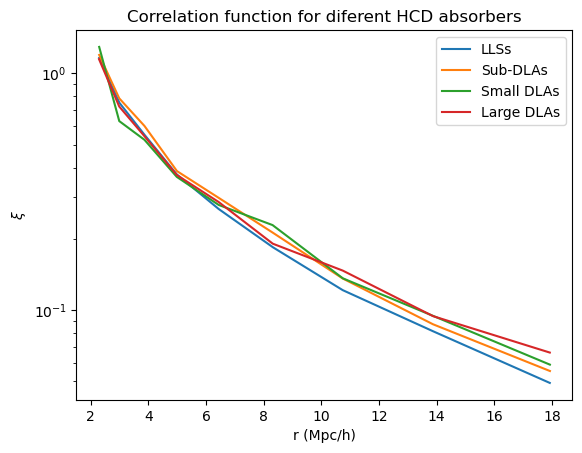

In [11]:
plt.plot(func_LLSs["ravg"], func_LLSs["xi"], label = "LLSs")
plt.plot(func_subDLAs["ravg"],func_subDLAs["xi"], label = "Sub-DLAs")
plt.plot(func_smallDLAs["ravg"], func_smallDLAs["xi"], label = "Small DLAs")
plt.plot(func_largeDLAs["ravg"], func_largeDLAs["xi"], label = "Large DLAs")
#plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Correlation function for diferent HCD absorbers")
plt.xlabel("r (Mpc/h)")
plt.ylabel(r"$\xi$")


In [13]:
dm_2pcf = np.array([0.25035231, 0.18709018, 0.13834741, 0.10005326, 0.07024488,
       0.0477699 , 0.03140954, 0.01982846, 0.0119537 ])

In [14]:
ratio_LLSs = func_LLSs["xi"]/dm_2pcf
ratio_subDLAs = func_subDLAs["xi"]/dm_2pcf
ratio_smallDLAs = func_smallDLAs["xi"]/dm_2pcf
ratio_largeDLAs = func_largeDLAs["xi"]/dm_2pcf

In [15]:
selected_xi_LLSs = ratio_LLSs[func_LLSs["ravg"] > 10]
selected_xi_subDLAs = ratio_subDLAs[func_subDLAs["ravg"] > 10]
selected_xi_smallDLAs = ratio_smallDLAs[func_smallDLAs["ravg"] > 10]
selected_xi_largeDLAs = ratio_largeDLAs[func_largeDLAs["ravg"] > 10]

Text(0, 0.5, '$\\xi$')

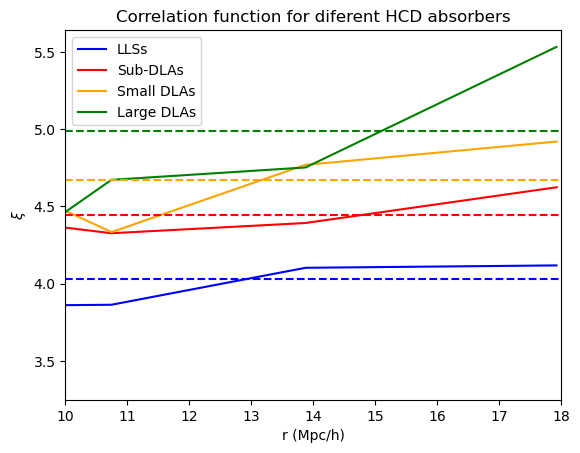

In [17]:
plt.plot(func_LLSs["ravg"], ratio_LLSs, color = 'b', label = "LLSs")
plt.plot(func_subDLAs["ravg"], ratio_subDLAs, color = 'r', label = "Sub-DLAs")
plt.plot(func_smallDLAs["ravg"], ratio_smallDLAs, color = 'orange', label = "Small DLAs")
plt.plot(func_largeDLAs["ravg"], ratio_largeDLAs, color = 'g', label = "Large DLAs")
plt.xlim(10,18)
plt.axhline(y=np.mean(selected_xi_LLSs), color='b', linestyle='--')
plt.axhline(y=np.mean(selected_xi_subDLAs), color='r', linestyle='--')
plt.axhline(y=np.mean(selected_xi_smallDLAs), color='orange', linestyle='--')
plt.axhline(y=np.mean(selected_xi_largeDLAs), color='g', linestyle='--')
plt.legend()
plt.title("Correlation function for diferent HCD absorbers")
plt.xlabel("r (Mpc/h)")
plt.ylabel(r"$\xi$")

In [18]:
coldenLLSs = np.array([])
for i in range(len(coords_LLSs["x"])):
    coldenLLSs = np.append(coldenLLSs, max_colden[int(coords_LLSs["x"][i]/dxy_hMpc),int(coords_LLSs["y"][i]/dxy_hMpc)])
meanLLSs=np.mean(coldenLLSs)

coldensubDLAs = np.array([])
for i in range(len(coords_subDLAs["x"])):
    coldensubDLAs = np.append(coldensubDLAs, max_colden[int(coords_subDLAs["x"][i]/dxy_hMpc),int(coords_subDLAs["y"][i]/dxy_hMpc)])
meansubDLAs=np.mean(coldensubDLAs)

coldensmallDLAs = np.array([])
for i in range(len(coords_smallDLAs["x"])):
    coldensmallDLAs = np.append(coldensmallDLAs, max_colden[int(coords_smallDLAs["x"][i]/dxy_hMpc),int(coords_smallDLAs["y"][i]/dxy_hMpc)])
meansmallDLAs=np.mean(coldensmallDLAs)

coldenlargeDLAs = np.array([])
for i in range(len(coords_largeDLAs["x"])):
    coldenlargeDLAs = np.append(coldenlargeDLAs, max_colden[int(coords_largeDLAs["x"][i]/dxy_hMpc),int(coords_largeDLAs["y"][i]/dxy_hMpc)])
meanlargeDLAs=np.mean(coldenlargeDLAs)

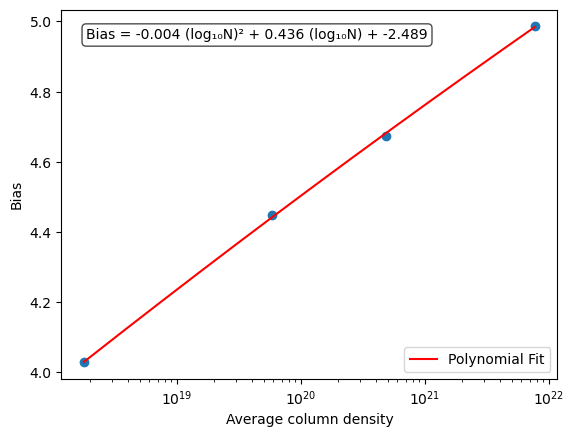

[-0.00432101  0.43603784 -2.4892404 ]


In [22]:
biasHCDs = np.array([np.mean(selected_xi_LLSs),
                     np.mean(selected_xi_subDLAs),
                     np.mean(selected_xi_smallDLAs),
                     np.mean(selected_xi_largeDLAs)])
CD = np.array([meanLLSs, meansubDLAs, meansmallDLAs, meanlargeDLAs])


plt.scatter(CD, biasHCDs)
plt.xlabel("Average column density")
plt.ylabel("Bias")
plt.xscale("log")

coeffs = np.polyfit(np.log10(CD), biasHCDs, 2)
logx_fit = np.linspace(np.log10(CD).min(), np.log10(CD).max(), 200)
y_fit = np.polyval(coeffs, logx_fit)
x_fit = 10 ** logx_fit


plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')


a, b, c = coeffs
equation = f'Bias = {a:.3f} (log₁₀N)² + {b:.3f} (log₁₀N) + {c:.3f}'

plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.legend(loc='lower right')
plt.show()

print(coeffs)